# Data Cleaning


In [24]:
#Import Libraries
import pandas as pd 
import os 
import csv 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [25]:
# 1. Create a DataFrame for the Emission data
emissions_data_df=pd.read_csv("https://dataanalyticsproject.s3.us-east-2.amazonaws.com/Merged_L5000.csv",index_col=[0])
emissions_data_df

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Emission,Population
0,2,Afghanistan,5058,Enteric Fermentation,7225,Emissions (CH4),1990,178.4682,12412.308
1,2,Afghanistan,5058,Enteric Fermentation,724413,Emissions (CO2eq) from CH4 (AR5),1990,4997.1108,12412.308
2,2,Afghanistan,5058,Enteric Fermentation,723113,Emissions (CO2eq) (AR5),1990,4997.1108,12412.308
3,2,Afghanistan,5059,Manure Management,7225,Emissions (CH4),1990,8.5165,12412.308
4,2,Afghanistan,5059,Manure Management,7230,Emissions (N2O),1990,0.3046,12412.308
...,...,...,...,...,...,...,...,...,...
728356,181,Zimbabwe,6516,Land Use change,7230,Emissions (N2O),2019,0.0000,14645.468
728357,181,Zimbabwe,6516,Land Use change,7273,Emissions (CO2),2019,10662.4408,14645.468
728358,181,Zimbabwe,6516,Land Use change,724413,Emissions (CO2eq) from CH4 (AR5),2019,0.0000,14645.468
728359,181,Zimbabwe,6516,Land Use change,724313,Emissions (CO2eq) from N2O (AR5),2019,0.0000,14645.468


In [26]:
emissions_CH4_df = emissions_data_df[emissions_data_df['Item_Code'].isin([5058, 5059, 5060, 5066, 6795, 6992, 6993, 6994, 6516]) & 
                                        (emissions_data_df['Element_Code'] == 7225) &
                                        (emissions_data_df['Year'] > 2010 )&(emissions_data_df['Emission']>1) &
                                            (emissions_data_df['Population'] > 5000) ]


emissions_CH4_df

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Emission,Population
506841,2,Afghanistan,5058,Enteric Fermentation,7225,Emissions (CH4),2011,402.5130,30117.413
506844,2,Afghanistan,5059,Manure Management,7225,Emissions (CH4),2011,26.1599,30117.413
506849,2,Afghanistan,5060,Rice Cultivation,7225,Emissions (CH4),2011,29.4000,30117.413
506872,2,Afghanistan,5066,Burning - Crop residues,7225,Emissions (CH4),2011,3.2219,30117.413
507073,4,Algeria,5058,Enteric Fermentation,7225,Emissions (CH4),2011,228.8808,36661.445
...,...,...,...,...,...,...,...,...,...
728251,181,Zimbabwe,5059,Manure Management,7225,Emissions (CH4),2019,7.4455,14645.468
728256,181,Zimbabwe,5060,Rice Cultivation,7225,Emissions (CH4),2019,1.8242,14645.468
728279,181,Zimbabwe,5066,Burning - Crop residues,7225,Emissions (CH4),2019,2.5388,14645.468
728288,181,Zimbabwe,6795,Savanna fires,7225,Emissions (CH4),2019,31.2309,14645.468


In [27]:
emissions_CH4_top_values = emissions_CH4_df.groupby(["Area_Code", "Item_Code", "Year"]).sum()["Emission"]
emissions_CH4_top_values

Area_Code  Item_Code  Year
2          5058       2011    402.5130
                      2012    396.9210
                      2013    393.0930
                      2014    398.2870
                      2015    383.3023
                                ...   
351        6994       2015    214.1508
                      2016    225.7656
                      2017    230.3679
                      2018    194.2298
                      2019    191.0673
Name: Emission, Length: 5034, dtype: float64

In [28]:
emissions_CH4_top_values = emissions_CH4_top_values.reset_index()
emissions_CH4_top_values

,Area_Code,Item_Code,Year,Emission
0,2,5058,2011,402.5130
1,2,5058,2012,396.9210
2,2,5058,2013,393.0930
3,2,5058,2014,398.2870
4,2,5058,2015,383.3023
...,...,...,...,...
5029,351,6994,2015,214.1508
5030,351,6994,2016,225.7656
5031,351,6994,2017,230.3679
5032,351,6994,2018,194.2298


In [29]:
emissions_CH4_top_values = emissions_CH4_top_values.sort_values(["Year","Emission"], ascending=False)
emissions_CH4_top_values.head(25)

,Area_Code,Item_Code,Year,Emission
1659,100,5058,2019,14053.6584
395,21,5058,2019,12681.5228
4979,351,5058,2019,6549.0320
854,41,5058,2019,6534.1552
4376,231,5058,2019,6092.2606
4997,351,5060,2019,5263.6067
872,41,5060,2019,5214.4547
1677,100,5060,2019,4621.4168
3070,165,5058,2019,4576.5830
1767,101,6516,2019,4021.7612


## Linear Regression - CH4 Emission 

### Analysis of Top countries and corresponding most impacting items

Enteric Fermentation Emission of China


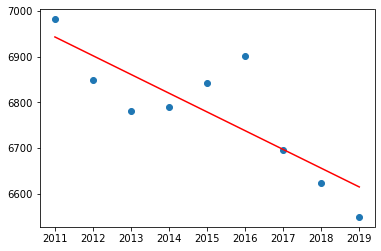

In [30]:
#Enteric Fermentation Emission of China
emissions_CH4_top1_g1 =  emissions_CH4_top_values[((emissions_CH4_top_values["Item_Code"] == 5058) & 
                        (emissions_CH4_top_values["Area_Code"] == 351))]

#Linear regression
print("Enteric Fermentation Emission of China")
X = emissions_CH4_top1_g1.Year
X = emissions_CH4_top1_g1.Year.values.reshape(-1, 1)
y = emissions_CH4_top1_g1.Emission
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

Rice Cultivation Emission of China


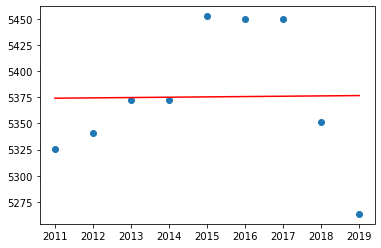

In [31]:
#Rice Cultivation Emission of China
emissions_CH4_top1_g2 =  emissions_CH4_top_values[((emissions_CH4_top_values["Item_Code"] == 5060) & 
                        (emissions_CH4_top_values["Area_Code"] == 351))]

#Linear regression
print("Rice Cultivation Emission of China")
X = emissions_CH4_top1_g2.Year
X = emissions_CH4_top1_g2.Year.values.reshape(-1, 1)
y = emissions_CH4_top1_g2.Emission
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

Enteric Fermentation Emission of India


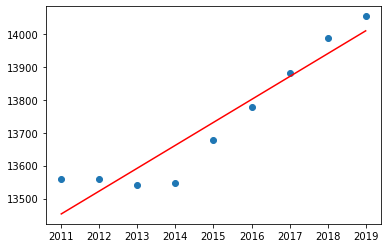

In [33]:
#Enteric Fermentation Emission of India
emissions_CH4_top2_g1 =  emissions_CH4_top_values[((emissions_CH4_top_values["Item_Code"] == 5058) & 
                        (emissions_CH4_top_values["Area_Code"] == 100))]

#Linear regression
print("Enteric Fermentation Emission of India")
X = emissions_CH4_top2_g1.Year
X = emissions_CH4_top2_g1.Year.values.reshape(-1, 1)
y = emissions_CH4_top2_g1.Emission
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

Rice Cultivation Emission of India


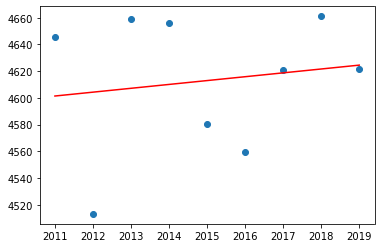

In [34]:
#Rice Cultivation Emission of India
emissions_CH4_top2_g2 =  emissions_CH4_top_values[((emissions_CH4_top_values["Item_Code"] == 5060) & 
                        (emissions_CH4_top_values["Area_Code"] == 100))]

#Linear regression
print("Rice Cultivation Emission of India")
X = emissions_CH4_top2_g2.Year
X = emissions_CH4_top2_g2.Year.values.reshape(-1, 1)
y = emissions_CH4_top2_g2.Emission
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

Enteric Fermentation Emission of Brazil


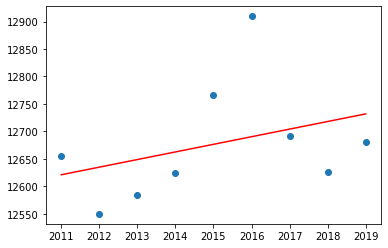

In [35]:
##Enteric Fermentation Emission of Brazil
emissions_CH4_top3_g1 =  emissions_CH4_top_values[((emissions_CH4_top_values["Item_Code"] == 5058) & 
                        (emissions_CH4_top_values["Area_Code"] == 21))]

#Linear regression
print("Enteric Fermentation Emission of Brazil")
X = emissions_CH4_top3_g1.Year
X = emissions_CH4_top3_g1.Year.values.reshape(-1, 1)
y = emissions_CH4_top3_g1.Emission
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

Land Use Change Emission of Indonesia


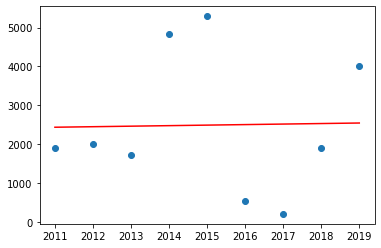

In [36]:
##Land Use Change Emission of Indonesia
emissions_CH4_top4_g1 =  emissions_CH4_top_values[((emissions_CH4_top_values["Item_Code"] == 6516) & 
                        (emissions_CH4_top_values["Area_Code"] == 101))]

#Linear regression
print("Land Use Change Emission of Indonesia")
X = emissions_CH4_top4_g1.Year
X = emissions_CH4_top4_g1.Year.values.reshape(-1, 1)
y = emissions_CH4_top4_g1.Emission
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()